# Lab Seven - Jupiter Images with Jupyter

## *Looking at Spacecraft Image Data from the Current Juno Mission*

In this lab we learn more about image data and image data manipulation.  

You will learn how to: 

- Plot multi-dimensional data. 
- Read in non CSV into a data format for analysis.
- Manipulate PNG data.
- Review using and developing functions.

By the end of this lab you should be able to: read in complicated data from non CSV formats.

Additional materials for reading: Plotting example - https://matplotlib.org/users/image_tutorial.html



## Are there any questions about anything we have done through Lab1 - Lab6? 

We have covered:
- basic Python
- reading data files
- Boolean indexing
- matplotlib, pandas, numpy
- subplot, error bars, legends
- missing data, datetimes
- functions
- user-defined packages/modules
- histograms, normal distributions, linear regression
- t-tests, $\chi^2$ tests, Welch's t-test
- geoplots
- formatting with $\LaTeX{}$
- reporting calculated/derived quantities with uncertainty (including appropriate use of significant figures)
- bootstrap method

## *Part 1 - Dealing with Reading In Lots of Files*

We will base this part of the lab off of data from the mission to Jupiter called Juno. We will be looking at image data (png) from the JunoCam instrument.  

Juno is a NASA mission to Jupiter, launched in 2011, that arrived at Jupiter on July 4th, 2016.

https://www.nasa.gov/mission_pages/juno/main/index.html
 
The current set of featured images can be found here https://www.missionjuno.swri.edu/junocam/processing?featured=1. 


## Let's start by importing the packages we will need for this lab.

In [1]:
#importing packages
import numpy as np               #for handling numbers w/ precision
import pandas as pd              #for handling dataframes
import matplotlib.pyplot as plt  #for plotting of datasets
import datetime as dt            #Importing the package datetime for 
                                 #datetime manipulation
import matplotlib.dates as mdt   #dates in matplotlib
import matplotlib.image as mpimg #for manipulation of img files
                                 #in plotting environments
import os                        #NEW IN THIS LAB - 
                                 #for interactive with files

#set up Jupyter environment so plots will be placed in the notebook
%matplotlib inline



### In our lab we are looking at data from 2017-03-2, 08:20:12.283 or Product ID - JNCE_2017086_05C00105_V01. When we download these image files we get many in one download. They are located in your folder ImageSet893. 

### It would be nice to import all of these into our Notebook. The function to use is mpimg.imread('filename') but we have at least 5 files. How can we import these files without writing the same line of code five times with different file names?

### Discuss with a partner - do not read ahead

'

''

'''

''''

'''

''

'

'

''

'''

''''

'''

''

'

'

''

'''

''''

'''

''

'

'

''

'''

''''

'''

''

'


### Part 1 A. Implemention with For Loop

In [2]:
#The command os.listdir() will print out all the files in your current directory. 

print(os.listdir())



['.ipynb_checkpoints', 'cosine_fit_hw5.ipynb', 'FinalPNGs', 'ImageSet893', 'lab7_jupiter_flyby.ipynb']


In [3]:
# To print out all the files within the ImageSet893 folder 
# we can change the auto option in os.listdir()

image_folder = './ImageSet893/' #where image files are for Juno
filenames = os.listdir(image_folder) #list all files within this directory

print(filenames)


['JNCE_2017086_05C00105_V01-blue.png', 'JNCE_2017086_05C00105_V01-green.png', 'JNCE_2017086_05C00105_V01-mapprojected.png', 'JNCE_2017086_05C00105_V01-raw.png', 'JNCE_2017086_05C00105_V01-red.png']


#### Important Note: File names, Jupyter notebooks, and Python Oh My! 

On your computer, your Jupyter notebook will look in the same directory for the files. In Python filenames format this means the shorthand file name './' where '.' means "current directory". 

The following short hand file naming conventions will be useful for this lab and the homework. 

- ./    (one dot then slash) look within this current folder (this is where the .ipynb file is located)

- ../   (two dots then slash) go up one folder (the parent directory) and look in in that location.  

- ~/    (tilde slash) the tilde is the user's HOME directory (can access any folder / file from here).

**Let's see if we can write a for loop to iterrate over the filenames.**


In [4]:
for f in filenames:
    print(image_folder + f)


./ImageSet893/JNCE_2017086_05C00105_V01-blue.png
./ImageSet893/JNCE_2017086_05C00105_V01-green.png
./ImageSet893/JNCE_2017086_05C00105_V01-mapprojected.png
./ImageSet893/JNCE_2017086_05C00105_V01-raw.png
./ImageSet893/JNCE_2017086_05C00105_V01-red.png


Does this look right? What if we want different names? There are several ways we can do
that, one useful way is to define a function that takes in a filename, and then returns
the object output by `mpimg.imread()`.

### Part 1 B. Implemention Of For Loop Within a Function

Now that we know the file names, let's create some time saving code.

In [5]:
def read_image_file(filename):
    '''
    All functions should have a description such as this - to describe what are inputs, 
    outputs, and function definitions. 
    
    This function takes in a filename as a string and outputs a file object from the 
    from the mpimg.imread function. 
    
    Notice here we are using a function to call another function. 
    There is no limit to how many times you can do this - one function can call another,
    which calls another, which calls another, ...
    
    The triple quotes used here makes this text a docstring. It is usefult
    for when users query this function's help.
    
    Input:        Type:
    filename      string
    
    Returns:
    fileobject    matplotlib image
    '''
    
    # Read in the file
    png_image = mpimg.imread(filename)

    #returns object
    return(png_image)

In [6]:
#let's see this in action

for f in filenames:
    png_image = read_image_file(image_folder + f)














### Discussion Time. There is something happening here that isn't quite what we want. Discuss with your partner.

'

''

'''

''''

'''

''

'


### Part 1 C. Choosing the data structure.


We don't know what type of object 'png_image' is - how can we deal with this? We would like to store all of our images into a single data structure, and we want be able to retrieve our items accurately and quickly. 

**Other options exist, but we will use a `dictionary` here.** Let's review briefly how dictionaries work.

In [7]:
# There are several methods for instantiating (creating) a dictionary.
# Here are two ways to create an empty dictionary.
test_dictionary = {}
test_dict = dict()


print(test_dictionary)
print(type(test_dictionary))
print(test_dict)
print(type(test_dict))

{}
<class 'dict'>
{}
<class 'dict'>


In [8]:
# We can fill our dictionary with whatever we want using key:value pairs.

test_dictionary['some_key'] = ['a value:', ' this is a list', 'with three items']
test_dictionary['answer'] = 42

# Any immutable object can be used as a key.
test_dictionary[42] = 'answer'
test_dictionary[('a tuple',)] = 'tuple with only one item'


print(test_dictionary)

# Look familiar?

{'some_key': ['a value:', ' this is a list', 'with three items'], 'answer': 42, 42: 'answer', ('a tuple',): 'tuple with only one item'}


In [9]:
# The values can be anything - for example:
test_dictionary['arange'] = np.arange(0, 5, 1)

# You can get the keys or access values using methods:
print('The dictionary keys are: ', test_dictionary.keys())
print('The dictionary values are: ', test_dictionary.values())

The dictionary keys are:  dict_keys(['some_key', 'answer', 42, ('a tuple',), 'arange'])
The dictionary values are:  dict_values([['a value:', ' this is a list', 'with three items'], 42, 'answer', 'tuple with only one item', array([0, 1, 2, 3, 4])])


In [10]:
# And to get a single value returned, we access the dictionary with the correct key.
some_arange = test_dictionary['arange']
print(some_arange)

[0 1 2 3 4]


#### Now we will (finally!) read in our data.

In [11]:
# Create empty dictionary to hold our image files.
image_data = {}


# Loop over filenames and calls function read_image_file to create dictionary entries
# with output of the images.

for f in filenames:
    # Each f is a string object. We can slice strings
    # similarly to how we slice lists or arrays.
    
    #creates the key       #reads in the file
    image_data[f[26:-4]] = read_image_file(image_folder + f)
                       

# Let's see how that worked.
print(image_data.keys())

dict_keys(['blue', 'green', 'mapprojected', 'raw', 'red'])


## *Part 2 - Objects and Multi-dimension Data*

Let's check out what we just read in - we know what the images look like - now what 
did they import as? 

In [12]:
#check out the type here and values of 

print(image_data['blue'], '\n', type(image_data['blue']))



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 <class 'numpy.ndarray'>


In [13]:
#this is a numpy ndarray - 
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.html

#you can get the size/shape/max/min of an numpy ndarray as such:

print(image_data['blue'].size)

print(image_data['blue'].shape)

print(image_data['blue'].max())

print(image_data['blue'].min())

2560000
(1600, 1600)
0.7490196
0.0


In [14]:
# Are all the files the same shape?

for k in image_data.keys():
    print(k, image_data[k].shape)

blue (1600, 1600)
green (1600, 1600)
mapprojected (1600, 1600, 3)
raw (12288, 1648)
red (1600, 1600)


We will spend more time on what the different terms mean in these documents in another lesson, but for us now:

Parameters can be put inside the () notation of the object, whereas attributes can be accessed with the .attribute format. Methods are a type of function that's associated with the object. For example, in objects which are of the class type np.ndarrays:
- .size is an attribute within the np.ndarray class.
- .min() is a method within the np.ndarray class.

We will cover this more in depth later but if you are curious more information can be found here:(https://docs.python.org/3.7/tutorial/classes.html)

In [15]:
#let's get help on the .min method? 

help(np.ndarray.min)

Help on method_descriptor:

min(...)
    a.min(axis=None, out=None, keepdims=False, initial=<no value>, where=True)
    
    Return the minimum along a given axis.
    
    Refer to `numpy.amin` for full documentation.
    
    See Also
    --------
    numpy.amin : equivalent function



### Review! What is the difference between a numpy ndarray and a Pandas dataframe based on what we just saw?

## *Part 3 - Plotting with imshow*

We have just imported a multi dimensional dataset. There are several ways to plot these. Let's start with the most basic. `imshow()` - more details can be found here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html or using the `help()` function.


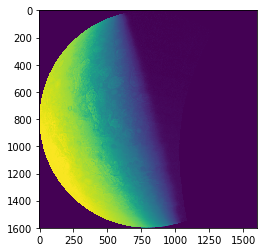

In [16]:
#simple version, we just feed it what we imported.
img_plot  = plt.imshow(image_data['red'])

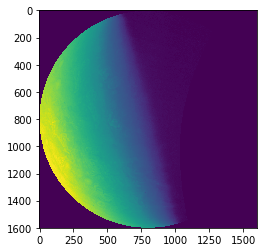

In [17]:
#while we expect, red, green, blue to plot simlilarly you can still see these are diff.
#image files

img_plot  = plt.imshow(image_data['blue'])

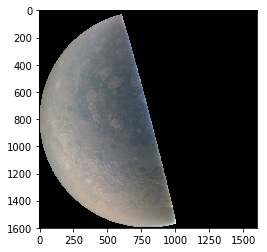

In [18]:
#what about mapprojected?

img_plot  = plt.imshow(image_data['mapprojected'])

### Discussion time! Why is the color scale different now? What did the map-projected file contain that is different? Why are the "blue" data not blue and the "red" data not red? 

### *Part 3 A. Colorscales*

We used the auto-preset. What if we want to have a different color scale? Examples of options can be found here. https://matplotlib.org/examples/color/colormaps_reference.html

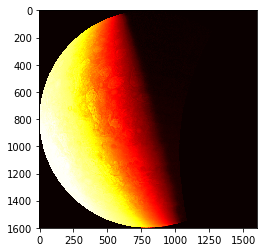

In [19]:
#plot out with different cmap, or color scale
img_plot  = plt.imshow(image_data['red'], cmap = 'hot')

#you can set you own scale, but for now we will use the python options. 

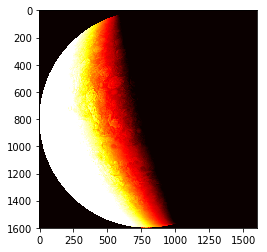

In [20]:
#to adjust the scale you can use vmin, vmax
#for example

img_plot  = plt.imshow(image_data['red'], cmap = 'hot', vmin = 0.2, 
                      vmax = 0.8)

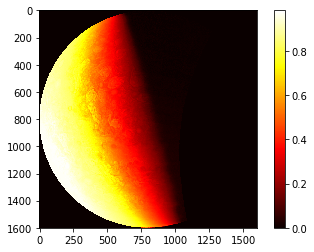

In [21]:
#it usually makes sense to set it to something similar to the min and max of the data
#like so - but adjusting slightly - also note addition of colorbar

img_plot  = plt.imshow(image_data['red'], cmap = 'hot', vmin = image_data['red'].min(), 
                      vmax = image_data['red'].max())


cb = plt.colorbar()

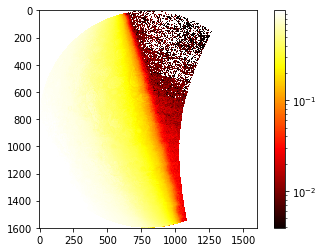

In [22]:
#see change in colorbar with norm commands? 
from matplotlib.colors import LogNorm

img_plot  = plt.imshow(image_data['red'], cmap = 'hot', norm = LogNorm())

cb = plt.colorbar()

### Disucssion Time: Do you think playing with the color scale would change anything in map-projected?
-

-

-

-

-

-

-

-

-

-

-

-

### Try out some colormaps of your own. Experiment with `vmin`, `vmax`. Try plotting the green and blue data.

Follow this link to pick your own colorbar: (https://matplotlib.org/examples/color/colormaps_reference.html)

In [ ]:
# Put your code here:
img_plot = plt.imshow(??)


#

In [ ]:
# What does the origin parameter change?
img_plot = plt.imshow(??, origin=??)


#

## *Part 4 - Plotting with Pcolormesh*¶

`imshow` is rather convenient for quick plotting, but sometimes you have data that has clear 
boundaries or data gaps. The main alternative for plotting data like this in matplotlib is 
`pcolormesh` (you might also find details about pcolor, but in general `pcolormesh` is faster).

In general do not use `imshow` except with image files. You might have data that CAN be shown as an image but for most scientific purposes it's better to use `pcolormesh`. 

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html

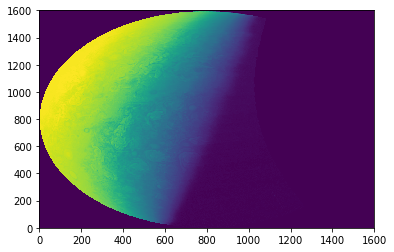

In [24]:
# The syntax for pcolormesh is similar (with some parameters differences) to imshow. 
p = plt.pcolormesh(image_data['red'])


### Activity Time! There are differences between `imshow()` and `pcolormesh()`. The below code changes aspects of the plot to appear like the `imshow` plot. 

### Go ahead and change the question marks in the below code:



In [ ]:
#set up figure
fig = plt.figure(figsize=(5, 11))
#sets up grid spacing
gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)
#add subplot
ax = fig.add_subplot(gs[:,:])


p = ax.pcolormesh(image_data['red'], cmap = ??)

#changes the aspect ratio
#ranges from 0 to 1
ax.set_aspect(?)

#reverses the y axis to appear in the same 
#orientation as imshow() figures above
plt.gca().invert_yaxis()

### *Part 4 A. - Multi-Figure Plotting (review)*

What if we wanted to plot red, green, and blue together?

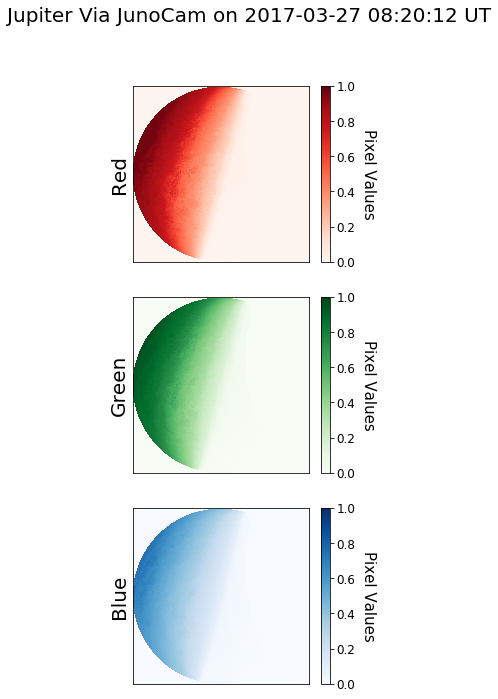

In [25]:
fig = plt.figure(figsize=(5, 11))
fig.suptitle('Jupiter Via JunoCam on 2017-03-27 08:20:12 UT', fontsize=20)

gs = plt.GridSpec(3, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
ax3 = fig.add_subplot(gs[2,:])

#make aspect ratio better - 1.0 is square. Feel free to play around with these
#and see how it streches.
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)
ax3.set_aspect(1.0)

#plot images data
p1 = ax1.pcolormesh(image_data['red'],   cmap = 'Reds', vmin = 0, vmax = 1)
p2 = ax2.pcolormesh(image_data['green'], cmap = 'Greens', vmin = 0, vmax = 1)
p3 = ax3.pcolormesh(image_data['blue'],  cmap = 'Blues', vmin = 0, vmax = 1)


#setting labeling
ax1.set_ylabel('Red',   fontsize = 20)
ax2.set_ylabel('Green', fontsize = 20)
ax3.set_ylabel('Blue',  fontsize = 20)


# This will remove both ticks and ticklabels;
# in this figure, neither are informative.
ax1.tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
ax2.tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
ax3.tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)


#set up the color bars to each axes
cb1 = plt.colorbar(p1, ax = ax1)
cb2 = plt.colorbar(p2, ax = ax2)
cb3 = plt.colorbar(p3, ax = ax3)


cb1.set_label('Pixel Values', labelpad=20,
                     rotation=270, fontsize=15)

cb2.set_label('Pixel Values', labelpad=20,
                     rotation=270, fontsize=15)

cb3.set_label('Pixel Values', labelpad=20,
                     rotation=270, fontsize=15)

#make the tick parameters to be large enough to read
cb1.ax.tick_params(labelsize=12)
cb2.ax.tick_params(labelsize=12)
cb3.ax.tick_params(labelsize=12)



**That is a LOT of repetitive code.** We repeat the same functions for three different subplots many times. The following cell produces the same figure, but in a (subjectively) cleaner way, using our favorite data structure: a `dictionary`. (Note that there are multiple ways to reduce repetitive code: find and choose your favorite.😁)

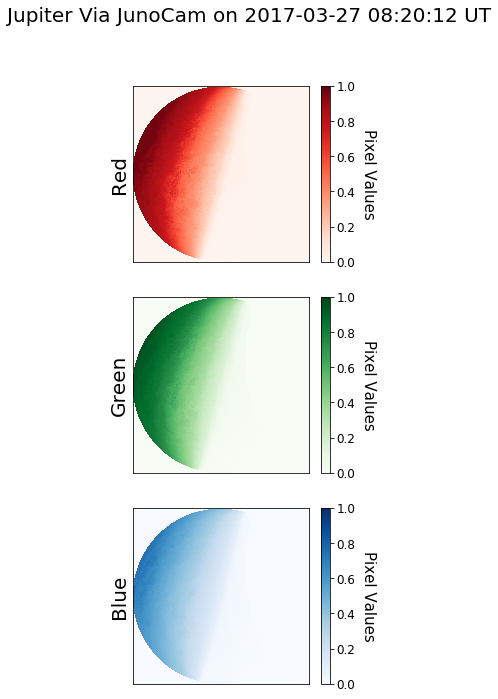

In [26]:
fig = plt.figure(figsize=(5, 11))
fig.suptitle('Jupiter Via JunoCam on 2017-03-27 08:20:12 UT', 
             fontsize=20)

gs = plt.GridSpec(3, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
ax3 = fig.add_subplot(gs[2,:])

# set up our dictionary
colors = ['red', 'green', 'blue']
axes_list = [ax1, ax2, ax3]

# the zip function acts like a zipper, binding the objects from 
# two lists together in the order that they are stored
# Here, the colors list becomes our keys, and the axes_list becomes
# the values associated with each key
axes = dict(zip(colors, axes_list))

# will also create a dictionary for our colormaps
colormap_list = ['Reds', 'Greens', 'Blues']
colormaps = dict(zip(colors, colormap_list))


# Now we reduce the amount of code we write and make it easier to 
# change later (only need to change one line instead of three)
for color in axes.keys():
    #make aspect ratio better - 1.0 is square.
    axes[color].set_aspect(1.0)
    
    #plot images data
    p = axes[color].pcolormesh(image_data[color],
                               cmap=colormaps[color],
                               vmin=0,
                               vmax=1)
    
    #setting labeling; what is [:-1] doing??
    axes[color].set_ylabel(colormaps[color][:-1], fontsize=20)
    
    # This will remove both ticks and ticklabels;
    # in this figure, neither are informative.
    axes[color].tick_params(axis='both', 
                            bottom=False,  
                            left=False, 
                            labelbottom=False,
                            labelleft=False)


    #set up the color bars to each axes
    cb = plt.colorbar(p, ax=axes[color])


    cb.set_label('Pixel Values', labelpad=20,
                 rotation=270, fontsize=15)

    
    #make the tick parameters to be large enough to read
    cb.ax.tick_params(labelsize=12)


### *Part 4 B. - Slicing into the Numpy NDarray -*

Remember the map projected dataset? Let's use that in our plotting - 

**In this plotting code cell, we will also use a loop to reduce
repeated code, but this time without using dictionaries.**

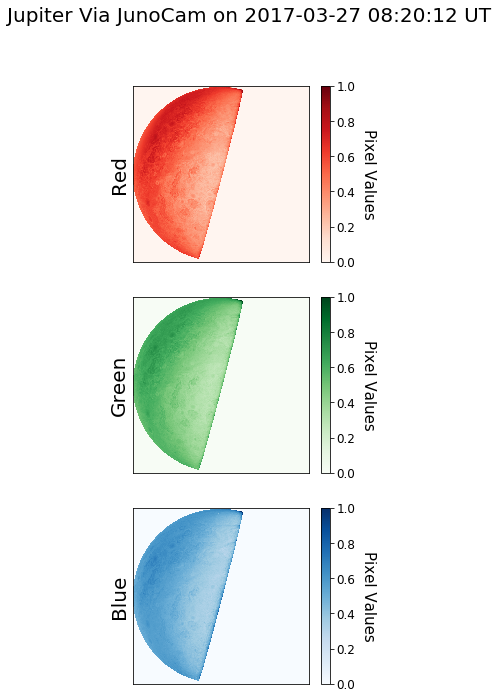

In [27]:
# We made this in the previous cell, just a reminder...
#colormap_list = ['Reds', 'Greens', 'Blues']

fig = plt.figure(figsize=(5, 11))
fig.suptitle('Jupiter Via JunoCam on 2017-03-27 08:20:12 UT', 
             fontsize=20)

gs = plt.GridSpec(3, 1, hspace=0.2, wspace=0.0, right = 0.8)


# We know that we will be using three subplots, so we use a for loop
# for three items.
for i in range(3):

    #add subplot
    ax = fig.add_subplot(gs[i,:])
    
    #make aspect ratio better - 1.0 is square.
    ax.set_aspect(1.0)

    #plot images data
    #-------------THIS IS CHANGED
    p = ax.pcolormesh(image_data['mapprojected'][:, :, i],
                      vmin = 0, 
                      vmax = 1,
                      cmap = colormap_list[i])

    #we've set the background to gray, by using set_under and vmin
    p.cmap.set_under('#d3d3d3')


    #if we want to then remove all the bright spots then
    #we've set the saturation points to gray,
    #by using set_over and vmin
    p.cmap.set_over('#d3d3d3')
    
    #-----------------------------


    #setting labeling
    ax.set_ylabel(colormap_list[i][:-1], fontsize = 20)


    # This will remove both ticks and ticklabels
    # where indicated.
    ax.tick_params(axis='both', 
                   bottom=False, 
                   labelbottom=False, 
                   left=False, 
                   labelleft=False)

    #set up the color bars to this axis
    cb = plt.colorbar(p, ax=ax)


    cb.set_label('Pixel Values', labelpad=20,
                 rotation=270, fontsize=15)

    cb.ax.tick_params(labelsize=12)

### See how the differences between the map-projected and non map projected change the plots? What do you think is going on here?

-

-

-

-

-

-

-

## *Part 5 - Augmenting Values in ndarray*

In the previous plot we accessed into the index using the three dimensional indexing [X, Y, Z] where Z designates the R, G, and B planels. What if we want to change the red values? Or highlight the green ones? In the below cell we print out the blue panel.

In [ ]:
#below print out the blue panel from the mapprojected data set
print(image_data[??][??, ??, ??])

# get some stats about the blue panel
# What is the Maximum value?
print(??)

# What is the Minimum value?
print(??)

# What is the size?
print(??)


# What is the shape?
print(??)

# What are the size and shape of the entire mapprojected array?
print(??)

### *Review*: What is the difference between the `size` and `shape` of an array?

-

-

-

-

-

-

-

-

-

-

### These values range from 0 to 1 with the first panel as red, second as green, third as blue. Let's increase the green and blue panels color ranges. 

In [29]:
#make a copy so we don't overrun our old dataset - setting equal will overrun our previous set
#https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.copy.html

image_data['mapprojectedAugment'] = np.copy(image_data['mapprojected'])


#change the green panel to increase by 10%

image_data['mapprojectedAugment'][:, :, 1]  = image_data['mapprojectedAugment'][:, :, 1]*1.1

#alternatively you could also use the *= syntax
#A = A*B is the same as A *= B


#change the blue panel to increase by 40%
image_data['mapprojectedAugment'][:, :, 2] *= 1.4



### What we did just overshoots the 1.0 values. Let's reset these values back to one or apply a ceiling. 

In [30]:
#This 'clips' numpy arrays and ndarrays between min and max, 
#in this case, 0 and 1
image_data['mapprojectedAugment'][:, :, 1] = np.clip(
    image_data['mapprojectedAugment'][:, :, 1], 0, 1)


image_data['mapprojectedAugment'][:, :, 2] = np.clip(
    image_data['mapprojectedAugment'][:, :, 2], 0, 1)


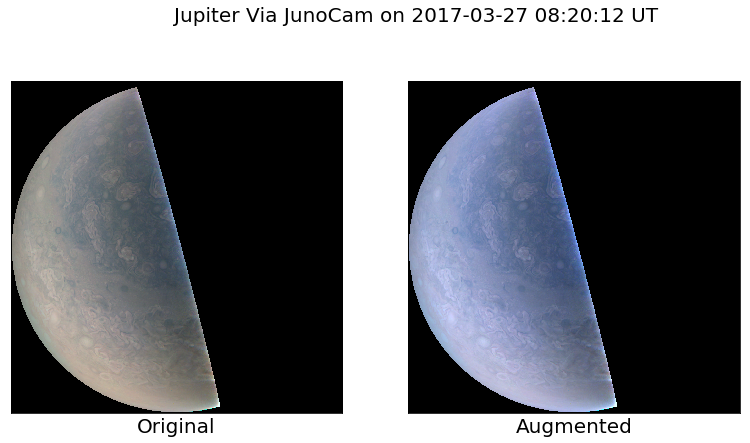

In [31]:
#and finally let's plot this.

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Jupiter Via JunoCam on 2017-03-27 08:20:12 UT', fontsize=20)

gs = plt.GridSpec(1, 2, hspace=0.1, wspace=0.2, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])

#make aspect ratio better - 1.0 is square. Feel free to play around with these
#and see how it streches.
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)

#plot images data - note for now use imshow to plot out the 3D datasets
ax1.imshow(image_data['mapprojected'])
ax2.imshow(image_data['mapprojectedAugment'])


#setting labeling
ax1.set_xlabel('Original',   fontsize = 20)
ax2.set_xlabel('Augmented', fontsize = 20)

# This will remove both ticks and ticklabels;
# in this figure, neither are informative.
ax1.tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
ax2.tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)



## *Part 5 B. - More Complicated Color Adjustments - *

Let's say we want to change values that have a more complicated prior condition? 

When setting more complicated boolean conditions you can use the and (&), and the (|) or conditions. 

The syntax for this indexing in dataframes is as follows:

((condition1) boolean operator (condition2))

Wherein the operators can be:

- & 'and', | 'or'
- <= 'less than or equal', >= 'greater than or equal'
- != 'and not equal to'



In [32]:
#let's reset our copy
image_data['mapprojectedAugment'] = image_data['mapprojected'].copy()


#and now let's have an index here 
bright_idx = ((image_data['mapprojectedAugment'][:, :, 0]   < 0.5) & 
              (image_data['mapprojectedAugment'][:, :, 1]   < 0.5) &
              (image_data['mapprojectedAugment'][:, :, 2]   > 0.3))

#let's multiply these values by 50%
image_data['mapprojectedAugment'][bright_idx] *= 1.5

#and clip the values
image_data['mapprojectedAugment'] = np.clip(
    image_data['mapprojectedAugment'], 0, 1)


### Plot Comparing the Pre-Augmented and Post-Augmented Datasets

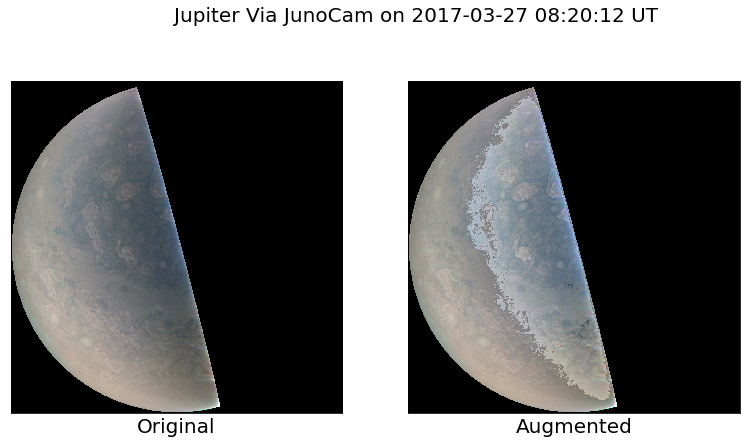

In [33]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Jupiter Via JunoCam on 2017-03-27 08:20:12 UT', fontsize=20)

gs = plt.GridSpec(1, 2, hspace=0.1, wspace=0.2, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])

#make aspect ratio better - 1.0 is square. Feel free to play around with these
#and see how it streches.
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)


#plot images data - note for now use imshow to plot out the 3D datasets
ax1.imshow(image_data['mapprojected'])
ax2.imshow(image_data['mapprojectedAugment'])


#setting labeling
ax1.set_xlabel('Original',   fontsize = 20)
ax2.set_xlabel('Augmented', fontsize = 20)

# This will remove both ticks and ticklabels;
# in this figure, neither are informative.
ax1.tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
ax2.tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)

#how to save data into png
mpimg.imsave('./FinalPNGs/augmentedProject.png', image_data['mapprojectedAugment'])

### Your turn!!! The above code uses a preset we choose to change the colors. Try a different boolean index here and see what your plot appears to be!

In [34]:
# Your code here for color manipulation!















# 

# SUMMARY

From this lab we have reviewed the basics of several data structures including dictionaries and numpy ndarrays. We reviewed `matplotlib.pyplot.imshow`, `matplotlib.pyplot.pcolormesh`, and basics of colorbars.